# bosten housing data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
housing=pd.read_csv('Housing.csv')

In [11]:
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [14]:
housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [18]:
housing.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

# EDA

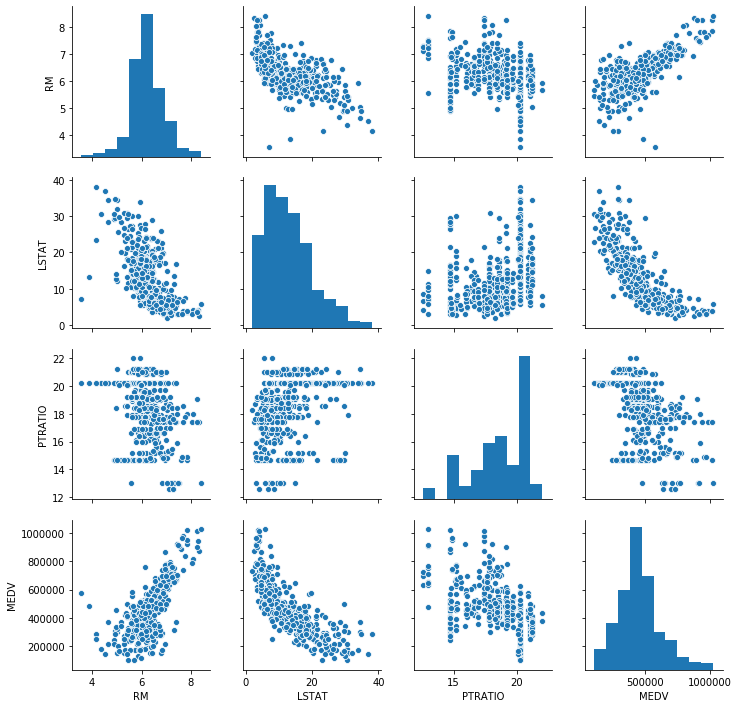

In [19]:
sns.pairplot(housing)

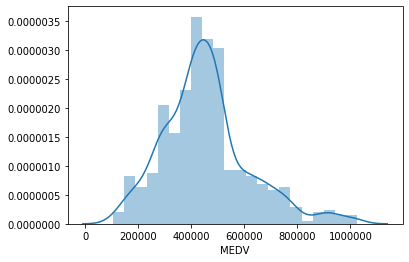

In [28]:
sns.distplot(housing[ 'MEDV'])

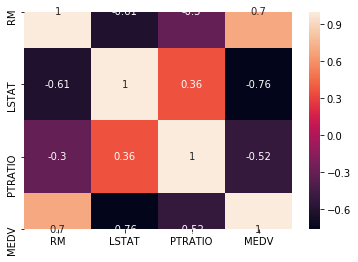

In [31]:
sns.heatmap(housing.corr(),annot=True)

In [32]:
X=housing[['RM', 'LSTAT', 'PTRATIO']]
y=housing[['MEDV']]

## Training a Linear Regression Model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4,random_state=101)

## Creating and Training the Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm=LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [38]:
(lm.intercept_)

array([548844.3733713])

In [39]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['cofficient'])
coeff_df

ValueError: Shape of passed values is (1, 3), indices imply (3, 1)

## Predictions from our Model

In [40]:
predictions= lm.predict(X_test)

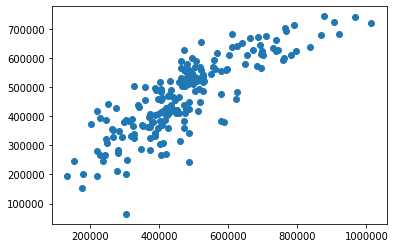

In [41]:
plt.scatter(y_test,predictions)

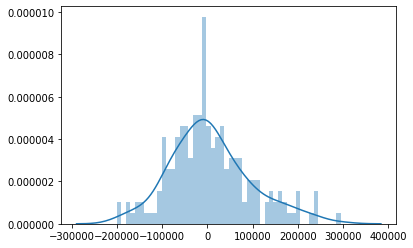

In [42]:
sns.distplot((y_test-predictions),bins=50)

# Regression Evaluation Metrics

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 68593.630483775
MSE: 8146921958.509603
RMSE: 90260.30112131026
